## 讀取資料

In [1]:
col = ['AttributionSequenceInSession', 'EventTimestamp', 'PageInstanceID',
       'PageLocation', 'PageLocationDomain', 'PageSequenceInAttribution',
       'PageSequenceInSession', 'PageTitle', 'ReferringPageInstanceID',
       'SessionNumber', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']

In [2]:
import pandas
df_lists = []
for l in 'abcdefg':
    if l == 'a':
        df = pandas.read_csv('bigdatatmp/ya{}'.format(l), encoding = 'utf-8' , parse_dates=[1])
    else:
        df = pandas.read_csv('bigdatatmp/ya{}'.format(l), header=None, encoding = 'utf-8' , parse_dates=[1])
        df.columns = col
    df_lists.append(df)

In [3]:
page01 = pandas.concat(df_lists)

In [5]:
page01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795332 entries, 0 to 804240
Data columns (total 13 columns):
AttributionSequenceInSession    int64
EventTimestamp                  datetime64[ns]
PageInstanceID                  int64
PageLocation                    object
PageLocationDomain              object
PageSequenceInAttribution       int64
PageSequenceInSession           int64
PageTitle                       object
ReferringPageInstanceID         object
SessionNumber                   int64
TopLevelWindowID                object
TrackingUuid                    object
ProfileUiid                     object
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 725.8+ MB


In [9]:
page01.to_hdf('test3.h5', 'test1', complevel = 9,complib = 'zlib' )

C:\Anaconda32\lib\site-packages\pandas\core\generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['PageLocation', 'PageLocationDomain', 'PageTitle', 'ReferringPageInstanceID', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [10]:
del page01

In [11]:
page01 = pandas.read_hdf('test3.h5')

In [13]:
page01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795332 entries, 0 to 804240
Data columns (total 13 columns):
AttributionSequenceInSession    int64
EventTimestamp                  datetime64[ns]
PageInstanceID                  int64
PageLocation                    object
PageLocationDomain              object
PageSequenceInAttribution       int64
PageSequenceInSession           int64
PageTitle                       object
ReferringPageInstanceID         object
SessionNumber                   int64
TopLevelWindowID                object
TrackingUuid                    object
ProfileUiid                     object
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 725.8+ MB


In [16]:
page01.head()

,AttributionSequenceInSession,EventTimestamp,PageInstanceID,PageLocation,PageLocationDomain,PageSequenceInAttribution,PageSequenceInSession,PageTitle,ReferringPageInstanceID,SessionNumber,TopLevelWindowID,TrackingUuid,ProfileUiid
0,1,2016-07-20 16:11:23.384,200292034,https://www.mybank.com.tw/mybank/home/MyMobiBank,https://www.mybank.com.tw,1,1,@MyBank - H,Null,20029488,_14690022832350.8330724521074444_,e91778f6-dd1a-469a-ae6e-8778e71c3460,Null
1,1,2016-07-20 20:12:59.788,201053626,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,2,2,@MyBank - H,Null,20105815,_14690167588220.0396215803685962_,a9fdf990-bd01-4370-87ec-72f1cf0b257f,Null
2,1,2016-07-20 11:31:30.485,198801327,https://www.mybank.com.tw/MyBank/Quicklinks/Home,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19880321,_14689854656640.46536951102007046_,4170b9b6-6cd0-4452-a40f-0469fdbf4489,Null
3,1,2016-07-20 12:45:29.674,199200852,app://com.cathaybk.mymobibank.android.app,app://com.cathaybk.mymobibank.android.app,1,1,@,Null,19920228,Null,2ca95944-8442-49cd-b37b-e18d460e003a,Null
4,1,2016-07-20 17:34:26.700,200603410,app://com.cathaybk.mmb.ios.app/@,app://com.cathaybk.mmb.ios.app,2,2,@,Null,20060810,Null,86e51bd4-3893-4b24-9a36-79172908be34,Null


In [19]:
page01.PageLocation.head(3)

0     https://www.mybank.com.tw/mybank/home/MyMobiBank
1    https://www.mybank.com.tw/MyBank/Quicklinks/Ho...
2     https://www.mybank.com.tw/MyBank/Quicklinks/Home
Name: PageLocation, dtype: object

In [21]:
page01['PageLocation'].head(3)

0     https://www.mybank.com.tw/mybank/home/MyMobiBank
1    https://www.mybank.com.tw/MyBank/Quicklinks/Ho...
2     https://www.mybank.com.tw/MyBank/Quicklinks/Home
Name: PageLocation, dtype: object

In [23]:
page01.PageLocation.str.contains('app:').head()

0    False
1    False
2    False
3     True
4     True
Name: PageLocation, dtype: bool

In [24]:
web01 = page01[~page01.PageLocation.str.contains('app:')]
web01.to_hdf('w1.h5', 'w1')

C:\Anaconda32\lib\site-packages\pandas\core\generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['PageLocation', 'PageLocationDomain', 'PageTitle', 'ReferringPageInstanceID', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


## 資料探索

In [26]:
web01.head()

,AttributionSequenceInSession,EventTimestamp,PageInstanceID,PageLocation,PageLocationDomain,PageSequenceInAttribution,PageSequenceInSession,PageTitle,ReferringPageInstanceID,SessionNumber,TopLevelWindowID,TrackingUuid,ProfileUiid
0,1,2016-07-20 16:11:23.384,200292034,https://www.mybank.com.tw/mybank/home/MyMobiBank,https://www.mybank.com.tw,1,1,@MyBank - H,Null,20029488,_14690022832350.8330724521074444_,e91778f6-dd1a-469a-ae6e-8778e71c3460,Null
1,1,2016-07-20 20:12:59.788,201053626,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,2,2,@MyBank - H,Null,20105815,_14690167588220.0396215803685962_,a9fdf990-bd01-4370-87ec-72f1cf0b257f,Null
2,1,2016-07-20 11:31:30.485,198801327,https://www.mybank.com.tw/MyBank/Quicklinks/Home,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19880321,_14689854656640.46536951102007046_,4170b9b6-6cd0-4452-a40f-0469fdbf4489,Null
5,1,2016-07-20 12:17:57.815,199060283,https://www.cathaybk.com.tw/cathaybk/personal_...,https://www.cathaybk.com.tw,1,1,w{@-HA-Yv,Null,19906076,_14689882765560.7659958160835434_,2ca95944-8442-49cd-b37b-e18d460e003a,Null
6,1,2016-07-20 09:49:22.541,198152696,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19815597,_14689757969690.06123872986063361_,9984fbef-6750-4e57-87c7-656f0b361d65,Null


In [28]:
web01.EventTimestamp.head()

0   2016-07-20 16:11:23.384
1   2016-07-20 20:12:59.788
2   2016-07-20 11:31:30.485
5   2016-07-20 12:17:57.815
6   2016-07-20 09:49:22.541
Name: EventTimestamp, dtype: datetime64[ns]

In [30]:
web01.EventTimestamp.dt.date.head()

0    2016-07-20
1    2016-07-20
2    2016-07-20
5    2016-07-20
6    2016-07-20
Name: EventTimestamp, dtype: object

In [31]:
web01.EventTimestamp.dt.date.value_counts()

2016-07-25    951282
2016-07-20    883184
2016-07-21    874897
2016-07-22    834354
2016-07-23    337603
2016-07-24    328683
Name: EventTimestamp, dtype: int64

In [37]:
web01.EventTimestamp.dt.date.count()

4210003

In [32]:
web_view_by_date = web01.EventTimestamp.dt.date.value_counts()

In [33]:
type(web_view_by_date)

pandas.core.series.Series

In [35]:
empty_series = pandas.Series()
print(empty_series)
empty_series= empty_series.append(web_view_by_date)
print(empty_series)

Series([], dtype: float64)
2016-07-25    951282
2016-07-20    883184
2016-07-21    874897
2016-07-22    834354
2016-07-23    337603
2016-07-24    328683
dtype: int64


## 讀取page01 ~ 07 的資料

In [36]:
import pandas
date_series = pandas.Series([])
for p in range(1,8):
    web = pandas.read_hdf('web0{}.h5'.format(p))
    web_view_date = web.EventTimestamp.dt.date.value_counts()
    date_series = date_series.append(web_view_date)


In [39]:
date_series.sort_index()

2016-07-20     883184
2016-07-21     874897
2016-07-22     834354
2016-07-23     337603
2016-07-24     328683
2016-07-25     951282
2016-07-26     898462
2016-07-27     877343
2016-07-28     913577
2016-07-29    1210027
2016-07-30     395106
2016-07-31     382709
2016-08-01    1456365
2016-08-02    1250164
2016-08-03    1146646
2016-08-04    1125910
2016-08-05    1612407
2016-08-06     450696
2016-08-07     373144
2016-08-08    1196956
2016-08-09    1146753
2016-08-10    1124049
2016-08-11    1161011
2016-08-12    1081757
2016-08-13     146594
2016-08-14     375267
2016-08-15    1234007
2016-08-16    1171552
2016-08-17    1103967
2016-08-18    1080477
2016-08-19    1069106
2016-08-20     406383
dtype: int64

In [41]:
%pylab inline
?date_series.plot
#date_series.sort_index().plot(kind='line')

Populating the interactive namespace from numpy and matplotlib


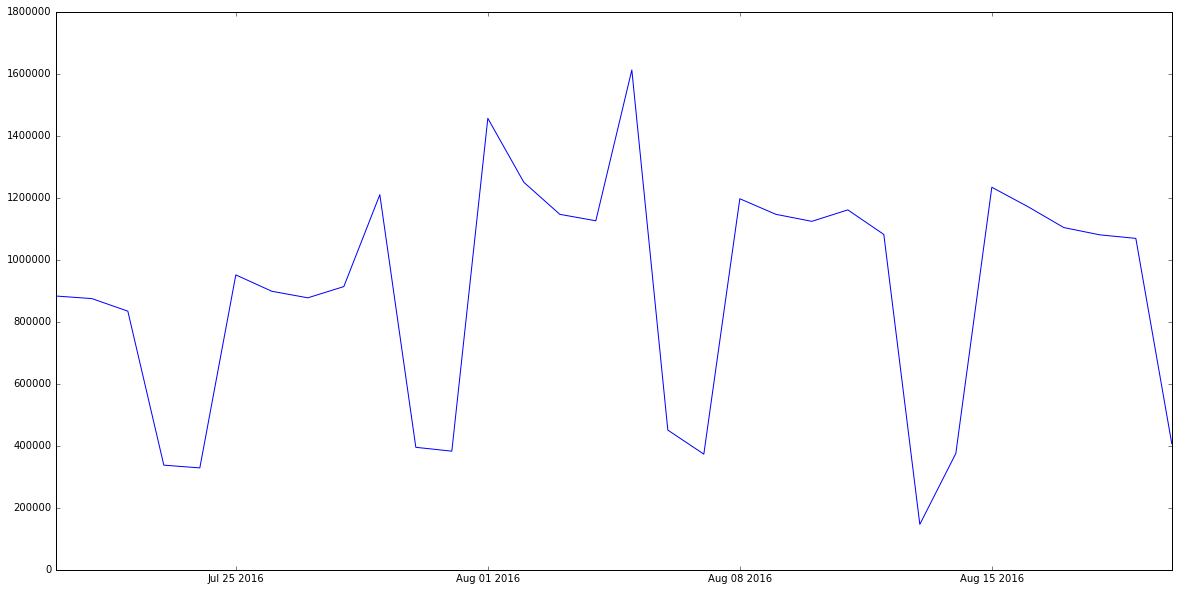

In [42]:
date_series.sort_index().plot(kind='line', figsize=[20, 10])

In [46]:
date_series.index =pandas.to_datetime(date_series.index)

In [51]:
from24to31 = date_series[(date_series.index >= '2016-07-24') & (date_series.index < '2016-07-31') ]

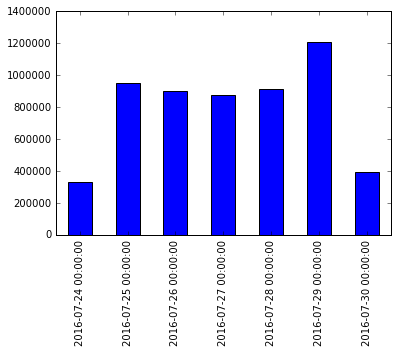

In [54]:
from24to31.sort_index().plot(kind='bar')

## 月末時候使用者都在看什麼

In [61]:
del web

In [56]:
import pandas
pageview0720_0730 = pandas.read_hdf('pageview0720_0730.h5')

In [62]:
pageview0720_0730.EventTimestamp.dt.date.value_counts()

2016-07-29    1210027
2016-07-25     951282
2016-07-28     913577
2016-07-26     898462
2016-07-20     883184
2016-07-27     877343
2016-07-21     874897
2016-07-22     834354
2016-07-30     395106
2016-07-31     382709
2016-07-23     337603
2016-07-24     328683
Name: EventTimestamp, dtype: int64

In [70]:
pagecnt0722= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-22') &
                 (pageview0720_0730.EventTimestamp < '2016-07-23')]['PageLocation'].value_counts()

In [72]:
pagecnt0722[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    115914
https://www.mybank.com.tw/mybank                                     69945
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              47824
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             36816
https://www.cathaybk.com.tw/cathaybk/                                35319
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          31110
https://www.mybank.com.tw/mybank/home/MyMobiBank                     28562
https://www.mybank.com.tw/MyBank/Home/Login                          21698
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     17905
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     15084
Name: PageLocation, dtype: int64

In [73]:
pagecnt0729= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-29') &
                 (pageview0720_0730.EventTimestamp < '2016-07-30')]['PageLocation'].value_counts()

In [74]:
pagecnt0729[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    173547
https://www.mybank.com.tw/mybank                                     99065
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              72819
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             67174
https://www.cathaybk.com.tw/cathaybk/                                45161
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          44202
https://www.mybank.com.tw/mybank/home/MyMobiBank                     38303
https://www.mybank.com.tw/MyBank/Home/Login                          33719
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     25942
https://www.myb2b.com.tw/ebank/default.asp                           22225
Name: PageLocation, dtype: int64

In [86]:
merged_df = pandas.concat([pagecnt0722, pagecnt0729], axis=1)

In [91]:
merged_df.columns= [ '0722', '0729']

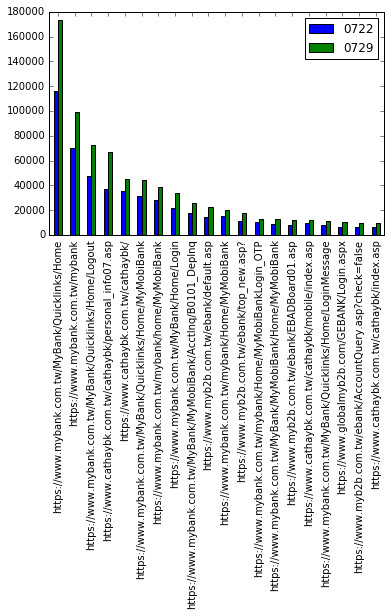

In [99]:
merged_df.sort_values('0729', ascending=False).head(20).plot(kind='bar')

In [100]:
pagecnt0724= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-24') &
                 (pageview0720_0730.EventTimestamp < '2016-07-25')]['PageLocation'].value_counts()

In [102]:
pagecnt0724[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    41680
https://www.mybank.com.tw/mybank                                    26118
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout             17836
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank         17421
https://www.mybank.com.tw/mybank/home/MyMobiBank                    16075
https://www.cathaybk.com.tw/cathaybk/                               11249
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     9630
https://www.mybank.com.tw/MyBank/Home/Login                          8931
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     8663
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             6201
Name: PageLocation, dtype: int64

In [106]:
pagecnt0722[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    115914
https://www.mybank.com.tw/mybank                                     69945
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              47824
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             36816
https://www.cathaybk.com.tw/cathaybk/                                35319
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          31110
https://www.mybank.com.tw/mybank/home/MyMobiBank                     28562
https://www.mybank.com.tw/MyBank/Home/Login                          21698
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     17905
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     15084
Name: PageLocation, dtype: int64

In [107]:
merged_df2 = pandas.concat([pagecnt0722, pagecnt0724], axis=1)

In [108]:
merged_df2.columns= [ '0722', '0724']

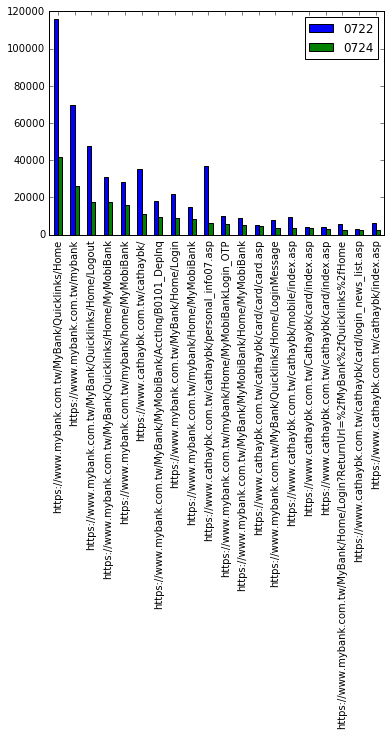

In [109]:
merged_df2.sort_values('0724', ascending=False).head(20).plot(kind='bar')

## 讀取Visitor 的資訊

In [1]:
import pandas
visitor = pandas.read_hdf('visitor.h5')
visitor.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232176 entries, 0 to 3232175
Data columns (total 4 columns):
CookieUniqueVisitorTrackingId    object
EventTimestamp                   datetime64[ns]
SessionNumber                    int64
TrackingUuid                     object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 123.3+ MB


In [112]:
visitor.head()

,CookieUniqueVisitorTrackingId,EventTimestamp,SessionNumber,TrackingUuid
0,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071
1,25811d71ea5f4edd9a784e1617a5a691,2016-07-20 20:13:13.161,20105815,53112d09-3db9-4106-b473-21242767df23
2,a3d2ca8ab6d94ca1adb9bd51a6e7d42f,2016-07-20 11:31:30.485,19880321,1db3e23d-2b8f-48c7-8551-5615ffd80ad1
3,7693b6b203f240599d71d31fd202f329,2016-07-20 12:45:29.674,19920228,a0d8cb8b-2022-4998-864f-2fab866b6b2a
4,c1f31e426e594b7ab2c8daf2b2c001c4,2016-07-20 17:34:25.508,20060810,b80043ad-53a0-4936-99d0-49443ef9cb4e


In [113]:
visitor['EventDate'] = visitor['EventTimestamp'].dt.date

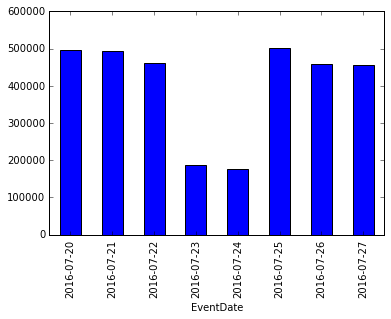

In [116]:
# select count(cookieuniquevisitortrackingid), eventdate from visior
# group by eventdate
visitor_cnt = visitor.groupby('EventDate')['CookieUniqueVisitorTrackingId'].count()
visitor_cnt.plot(kind= 'bar')

In [117]:
# select cookieuniquevisitortrackingid, eventdate, count(session) from visitor
# group by cookieuniquevisitortrackingid, eventdate
visitor_on_site = visitor.groupby(['EventDate','CookieUniqueVisitorTrackingId'])['SessionNumber'].count()


In [119]:
import pandas
pandas.to_datetime(visitor_on_site.index.get_level_values('EventDate')) == '2016-07-20' 

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [136]:
visitor_on_0720  = visitor_on_site[pandas.to_datetime(visitor_on_site.index.get_level_values('EventDate')) == '2016-07-20' ]

In [122]:
visitor_on_0720.head()

EventDate   CookieUniqueVisitorTrackingId   
2016-07-20  000030264ec54bb997703e9e05d25c4d    4
            00003862177641d08c8fa11eb807feb0    2
            000044d10f0a41a68ad6c91bc2afae22    2
            000048e29626421ea25e0497a09b2d74    1
            0000ae4014c24ad58287bf3481f1fef1    1
Name: SessionNumber, dtype: int64

In [124]:
visitor_on_0720.describe()

count    262361.000000
mean          1.886969
std           1.937555
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         656.000000
Name: SessionNumber, dtype: float64

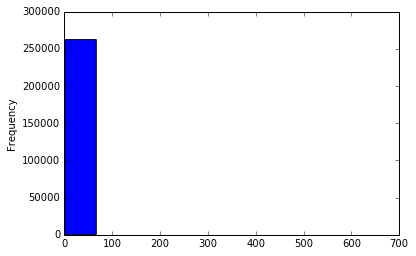

In [125]:
visitor_on_0720.plot(kind='hist')

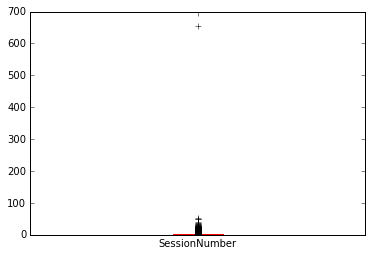

In [137]:
visitor_on_0720.plot(kind='box')

In [128]:
visitor_on_0720.sort_values(ascending=False).head()

EventDate   CookieUniqueVisitorTrackingId   
2016-07-20  ?                                   656
            36686bfc2aac4d72b231efe6a92c2098     54
            7d20af43a7e841b6a7ba74f9663c081d     50
            6b6b6fec868d4a2aa1c71998dd258472     50
            8c0400581a214af6b2638d9138ad8e04     41
Name: SessionNumber, dtype: int64

In [138]:
visitor_on_0720 = visitor_on_0720[visitor_on_0720 < 100]

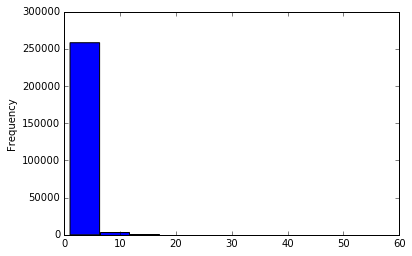

In [134]:
visitor_on_0720.plot(kind='hist')

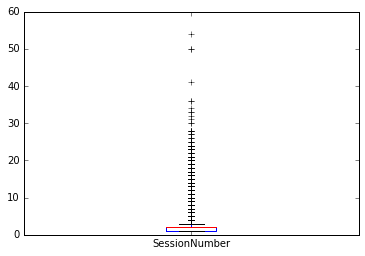

In [139]:
visitor_on_0720.plot(kind='box')

In [145]:
visitor_on_0720.describe()

count    262360.000000
mean          1.884476
std           1.457153
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          54.000000
Name: SessionNumber, dtype: float64

In [2]:
import pandas
pageview = pandas.read_hdf('pageview0720_0730.h5')

In [149]:
pageview.head()

,EventTimestamp,PageLocation,SessionNumber,TrackingUuid
0,2016-07-20 16:11:23.384,https://www.mybank.com.tw/mybank/home/MyMobiBank,20029488,e91778f6-dd1a-469a-ae6e-8778e71c3460
1,2016-07-20 20:12:59.788,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,20105815,a9fdf990-bd01-4370-87ec-72f1cf0b257f
2,2016-07-20 11:31:30.485,https://www.mybank.com.tw/MyBank/Quicklinks/Home,19880321,4170b9b6-6cd0-4452-a40f-0469fdbf4489
5,2016-07-20 12:17:57.815,https://www.cathaybk.com.tw/cathaybk/personal_...,19906076,2ca95944-8442-49cd-b37b-e18d460e003a
6,2016-07-20 09:49:22.541,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,19815597,9984fbef-6750-4e57-87c7-656f0b361d65


In [153]:
# select count(sessionnumber), count(pagelocation)
# from pageview groupby (sessionnumber)
pageview.groupby('PageLocation')['SessionNumber'].count().sort_values(ascending=False)[0:10]

PageLocation
https://www.mybank.com.tw/MyBank/Quicklinks/Home                    1263661
https://www.mybank.com.tw/mybank                                     754313
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              506928
https://www.cathaybk.com.tw/cathaybk/                                363317
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             355214
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          354759
https://www.mybank.com.tw/mybank/home/MyMobiBank                     326093
https://www.mybank.com.tw/MyBank/Home/Login                          233959
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     205154
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     171560
Name: SessionNumber, dtype: int64

In [155]:
visitor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232176 entries, 0 to 3232175
Data columns (total 5 columns):
CookieUniqueVisitorTrackingId    object
EventTimestamp                   datetime64[ns]
SessionNumber                    int64
TrackingUuid                     object
EventDate                        object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 148.0+ MB


In [157]:
pageview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887227 entries, 0 to 378996
Data columns (total 4 columns):
EventTimestamp    datetime64[ns]
PageLocation      object
SessionNumber     int64
TrackingUuid      object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 339.0+ MB


In [3]:
#select * from visitor inner join pageview 
#on visitor.sessionnumber = pageview.sesssionumber

import pandas
#?pandas.merge
visitor_pageview = pandas.merge(visitor, pageview, left_on='SessionNumber',
             right_on='SessionNumber', how = 'inner')

In [161]:
visitor_pageview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10459878 entries, 0 to 10459877
Data columns (total 8 columns):
CookieUniqueVisitorTrackingId    object
EventTimestamp_x                 datetime64[ns]
SessionNumber                    int64
TrackingUuid_x                   object
EventDate                        object
EventTimestamp_y                 datetime64[ns]
PageLocation                     object
TrackingUuid_y                   object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 718.2+ MB


In [163]:
visitor_pageview.head()

,CookieUniqueVisitorTrackingId,EventTimestamp_x,SessionNumber,TrackingUuid_x,EventDate,EventTimestamp_y,PageLocation,TrackingUuid_y
0,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:23.384,https://www.mybank.com.tw/mybank/home/MyMobiBank,e91778f6-dd1a-469a-ae6e-8778e71c3460
1,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:43.150,https://www.mybank.com.tw/MyBank/MyMobiBank/Ac...,e91778f6-dd1a-469a-ae6e-8778e71c3460
2,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:23.384,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:23.384,https://www.mybank.com.tw/mybank/home/MyMobiBank,e91778f6-dd1a-469a-ae6e-8778e71c3460
3,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:23.384,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:43.150,https://www.mybank.com.tw/MyBank/MyMobiBank/Ac...,e91778f6-dd1a-469a-ae6e-8778e71c3460
4,25811d71ea5f4edd9a784e1617a5a691,2016-07-20 20:13:13.161,20105815,53112d09-3db9-4106-b473-21242767df23,2016-07-20,2016-07-20 20:12:59.788,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,a9fdf990-bd01-4370-87ec-72f1cf0b257f


In [9]:
visitor_pageview_20160720 = visitor_pageview[visitor_pageview.EventTimestamp_x < '2016-07-21']


In [170]:
visitor_pageview_20160720.groupby('CookieUniqueVisitorTrackingId')['SessionNumber'].nunique().sort_values(ascending=False)

CookieUniqueVisitorTrackingId
?                                   624
8c0400581a214af6b2638d9138ad8e04     41
6e62e7f5f9a94f1e86e8681e6a864e58     32
b776ca05d13846b483f5b3426d4c3f72     30
13bafab96f5e49e28967fea8591cc374     27
e6b23003898f42d88131a82c17e92078     25
84e7c81b495141d8b44139530d495f0a     25
a844d81647b046b58f4fb00fc23739c8     24
f6decfb8f0bf44d6a96ececc5589353d     23
2887f2fb5a284e4a9529f6a040e0a283     21
5e0de95618a447f498ad91e1cf78d271     21
625bf75a577949cfa85e6200fc2d9cda     19
0b80beabb03e451697bf345c1607a8e4     18
81dc61801c924c39a00f93b14c3ff383     18
3795f1613a75443ba91c867c18a35bc3     18
9e34ec2d5e094329b9318cfa91e8aeaa     18
875550ae8b1146ab972e980c8c91235d     18
0b4a742e7de647a8ad23cb41b6a97d89     18
9146d7cf40ee4ceb8f896052379febe9     17
4c5555431b81413986d4305de905215b     17
6ef5af82981646adbac68030a43bfe42     17
d9a558d5721848e5bd36c5a390ea26c9     17
035d9c27a9be4e87b3d8d7d71e0dc008     16
b964822963134abc886a90b9e4422927     16
fb3c9f00a3

In [10]:
pandas.set_option('display.max_colwidth', -1)

visitor_pageview_20160720[visitor_pageview_20160720['CookieUniqueVisitorTrackingId'] == 'b776ca05d13846b483f5b3426d4c3f72']['PageLocation'].head()

42061     https://www.cathaybk.com.tw/cathaybk/personal_info07.asp
173737    https://www.cathaybk.com.tw/cathaybk/personal_info07.asp
174299    https://www.cathaybk.com.tw/cathaybk/personal_info07.asp
174300    https://www.cathaybk.com.tw/cathaybk/personal_info07.asp
205632    https://www.cathaybk.com.tw/cathaybk/personal_info07.asp
Name: PageLocation, dtype: object

In [11]:
import pandas
url_mapping_raw = pandas.read_excel('bigdata/url_mapping.xlsx', 
                    sheetname = [i for i in range(1,12)])

In [12]:
url_mapping_concat = pandas.concat(url_mapping_raw)

In [13]:
tag_map  = url_mapping_concat[['URL', '層級2','頁面名稱']]

In [14]:
visitor_pageview_20160720.PageLocation = visitor_pageview_20160720.PageLocation.str.strip('/')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
visitor_pageview_tag_20160720 = pandas.merge(visitor_pageview_20160720 ,tag_map, left_on='PageLocation', right_on='URL', how = 'left')

In [234]:
visitor_pageview_tag_20160720.head()

,CookieUniqueVisitorTrackingId,EventTimestamp_x,SessionNumber,TrackingUuid_x,EventDate,EventTimestamp_y,PageLocation,TrackingUuid_y,URL,層級2,頁面名稱
0,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:23.384,https://www.mybank.com.tw/mybank/home/MyMobiBank,e91778f6-dd1a-469a-ae6e-8778e71c3460,https://www.mybank.com.tw/mybank/home/MyMobiBank,行動首頁,行動首頁
1,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:43.150,https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq,e91778f6-dd1a-469a-ae6e-8778e71c3460,NaN,NaN,NaN
2,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:23.384,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:23.384,https://www.mybank.com.tw/mybank/home/MyMobiBank,e91778f6-dd1a-469a-ae6e-8778e71c3460,https://www.mybank.com.tw/mybank/home/MyMobiBank,行動首頁,行動首頁
3,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:23.384,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071,2016-07-20,2016-07-20 16:11:43.150,https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq,e91778f6-dd1a-469a-ae6e-8778e71c3460,NaN,NaN,NaN
4,25811d71ea5f4edd9a784e1617a5a691,2016-07-20 20:13:13.161,20105815,53112d09-3db9-4106-b473-21242767df23,2016-07-20,2016-07-20 20:12:59.788,https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank,a9fdf990-bd01-4370-87ec-72f1cf0b257f,NaN,NaN,NaN


In [236]:
visitor_pageview_tag_20160720[visitor_pageview_tag_20160720['層級2'].isnull()]['PageLocation'].head()

1    https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq
3    https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq
4    https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank     
5    https://www.mybank.com.tw/mybank/Home/MyMobiBank                
6    https://www.mybank.com.tw/MyBank/MyMobiBank/CQuery/C0102_BillInq
Name: PageLocation, dtype: object

In [245]:
visitor_grpby_20160720 = visitor_pageview_tag_20160720.groupby(['CookieUniqueVisitorTrackingId','層級2'])['CookieUniqueVisitorTrackingId'].count()


In [246]:
type(visitor_grpby_20160720) #.head(100)

pandas.core.series.Series

In [247]:
visitor_grpby_20160720 = visitor_grpby_20160720.reset_index('層級2')
visitor_grpby_20160720.head()

,層級2,CookieUniqueVisitorTrackingId
CookieUniqueVisitorTrackingId,,
000030264ec54bb997703e9e05d25c4d,線上櫃台,4
000030264ec54bb997703e9e05d25c4d,首頁,32
00003862177641d08c8fa11eb807feb0,線上櫃台,2
00003862177641d08c8fa11eb807feb0,首頁,4
000044d10f0a41a68ad6c91bc2afae22,首頁,2


In [248]:
visitor_grpby_20160720.columns = ['level2', 'count']

In [255]:
visitor_grpby_20160720 = visitor_grpby_20160720.reset_index()

In [256]:
visitor_grpby_20160720.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235285 entries, 0 to 235284
Data columns (total 3 columns):
CookieUniqueVisitorTrackingId    235285 non-null object
level2                           235285 non-null object
count                            235285 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.4+ MB


In [283]:
pivoted = visitor_grpby_20160720.pivot(index='CookieUniqueVisitorTrackingId', columns='level2', values='count')

In [284]:
pivoted = pivoted.ix[:,20:30]

In [267]:
a = pandas.DataFrame([{'height':180, 'weight': 70, 'age':21}, 
                      {'height':170, 'weight':62, 'age':18},
                      {'height':160, 'weight':46, 'age':35}])

In [269]:
a.cov()

,age,height,weight
age,82.333333,-70.0,-97.333333
height,-70.000000,100.0,120.000000
weight,-97.333333,120.0,149.333333


In [270]:
a.corr()

,age,height,weight
age,1.000000,-0.771454,-0.877800
height,-0.771454,1.000000,0.981981
weight,-0.877800,0.981981,1.000000


In [285]:
pivoted.corr()

level2,優惠精選,公告事項,其他服務,其他貸款商品,其他貸款商品-小額農業貸款,其他貸款商品-汽車貸款,其他貸款商品-股票質押貸款,利率查詢,刷卡優惠-信用卡活動登陸,刷卡優惠-信用卡理財
level2,,,,,,,,,,
優惠精選,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.576363,1.000000
公告事項,NaN,1.000000,0.090784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
其他服務,NaN,0.090784,1.000000,-0.081111,NaN,NaN,-0.081111,0.922417,0.675918,0.764816
其他貸款商品,NaN,NaN,-0.081111,1.000000,0.484200,0.530240,1.000000,-0.176777,NaN,-0.428161
其他貸款商品-小額農業貸款,NaN,NaN,NaN,0.484200,1.000000,0.371267,0.484200,NaN,NaN,NaN
其他貸款商品-汽車貸款,NaN,NaN,NaN,0.530240,0.371267,1.000000,0.530240,NaN,NaN,NaN
其他貸款商品-股票質押貸款,NaN,NaN,-0.081111,1.000000,0.484200,0.530240,1.000000,-0.176777,NaN,-0.428161
利率查詢,NaN,NaN,0.922417,-0.176777,NaN,NaN,-0.176777,1.000000,-0.058321,-0.097918
刷卡優惠-信用卡活動登陸,0.576363,NaN,0.675918,NaN,NaN,NaN,NaN,-0.058321,1.000000,0.411343


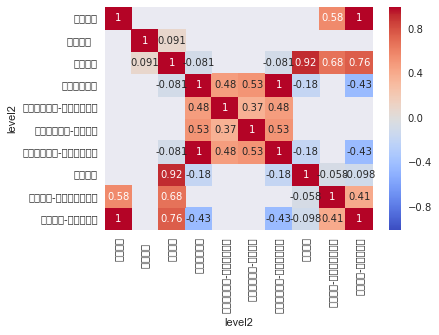

In [286]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(pivoted.corr(), annot=True, center=0, cmap='coolwarm')

In [16]:
url_grp_20160720 = visitor_pageview_20160720.groupby(['CookieUniqueVisitorTrackingId', 'PageLocation'])['CookieUniqueVisitorTrackingId'].count()

In [17]:
url_grp_20160720 = url_grp_20160720.reset_index('PageLocation')
#url_grp_20160720.head() 
#=url_grp_20160720.reset_index()

In [18]:
url_grp_20160720.head()

,PageLocation,CookieUniqueVisitorTrackingId
CookieUniqueVisitorTrackingId,,
000030264ec54bb997703e9e05d25c4d,https://www.mybank.com.tw/MyBank/Home/Login,8
000030264ec54bb997703e9e05d25c4d,https://www.mybank.com.tw/MyBank/Home/LoginMessageReLogin,4
000030264ec54bb997703e9e05d25c4d,https://www.mybank.com.tw/MyBank/Quicklinks/Home,24
000030264ec54bb997703e9e05d25c4d,https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout,8
000030264ec54bb997703e9e05d25c4d,https://www.mybank.com.tw/mybank,4


In [19]:
url_grp_20160720.columns = ['PageLocation', 'Count']

In [27]:
pivoted2 = url_grp_20160720.head(100000).pivot(columns = 'PageLocation' , values = 'Count')

In [28]:
pivoted2 = pivoted2.ix[:,20:50]

In [29]:
pivoted2.corr()

PageLocation,https://www.cathaybk.com.tw/Cathaybk/card/login_news_list.asp,https://www.cathaybk.com.tw/Cathaybk/deposit/rate.asp,https://www.cathaybk.com.tw/Cathaybk/e_service/linepay/event/2015/201512linepay,https://www.cathaybk.com.tw/Cathaybk/index.asp,https://www.cathaybk.com.tw/Cathaybk/index_personal.asp,https://www.cathaybk.com.tw/Cathaybk/personal_foreign05.asp,https://www.cathaybk.com.tw/Cathaybk/personal_info06.asp,https://www.cathaybk.com.tw/Cathaybk/personal_info07.asp,https://www.cathaybk.com.tw/Cathaybk/personal_marketing.asp,https://www.cathaybk.com.tw/Cathaybk/personal_marketing_life.asp,...,https://www.cathaybk.com.tw/Cathaybk/vip/news.asp,https://www.cathaybk.com.tw/MobileAcct/WebOpenAct.aspx,https://www.cathaybk.com.tw/MobileAcct/WebOpenAct_1.aspx,https://www.cathaybk.com.tw/MobileAcct/WebOpenAct_step2.aspx,https://www.cathaybk.com.tw/MobileAcct/WebOpenAct_step3.aspx,https://www.cathaybk.com.tw/cathaybk,https://www.cathaybk.com.tw/cathaybk/#,https://www.cathaybk.com.tw/cathaybk//card/event/bonus/bonus_2_1.asp,https://www.cathaybk.com.tw/cathaybk//enterprise_finance03.asp,https://www.cathaybk.com.tw/cathaybk/?aspxerrorpath=/cathaybk/DSA/OpenAccount/Step1.aspx
PageLocation,,,,,,,,,,,,,,,,,,,,,
https://www.cathaybk.com.tw/Cathaybk/card/login_news_list.asp,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/deposit/rate.asp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/e_service/linepay/event/2015/201512linepay,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/index.asp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/index_personal.asp,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/personal_foreign05.asp,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/personal_info06.asp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/personal_info07.asp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.cathaybk.com.tw/Cathaybk/personal_marketing.asp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


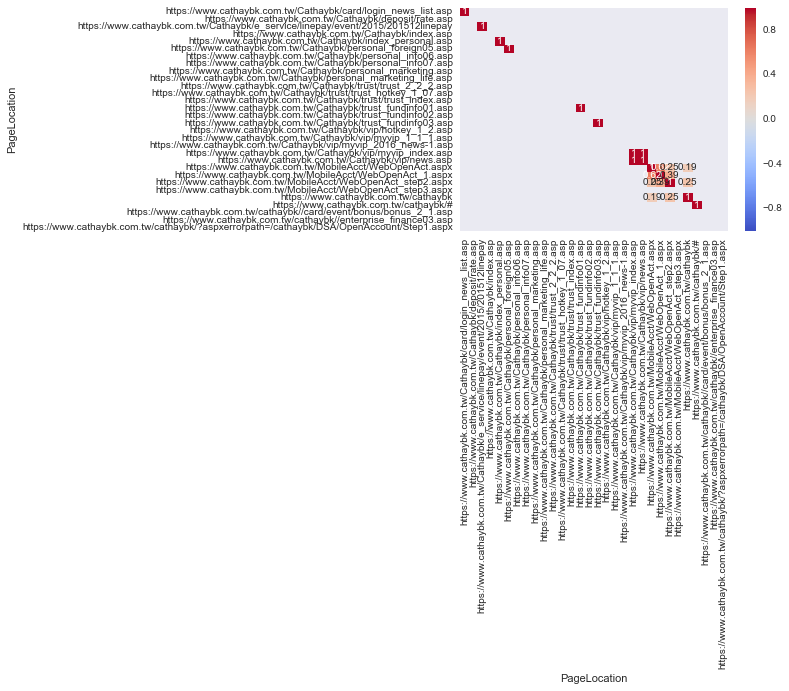

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(pivoted2.corr(), annot=True, center=0, cmap='coolwarm')